## Data Cleaning and Feature Selection 

#### Steps : 

##### 1.  Find the Columns which have different types of data (Unique,Duplicate,Numeric, String , NAN, etc ) for getting a rough sketch of the type of data we are dealing with. 
##### 2. Analze Basic Stats of different columns, eg . The number of defaulters, non-defaulters, Different states, Total number of loans per state


In [238]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import pprint
import calendar
import os,sys
import warnings
import pickle
warnings.filterwarnings('ignore')

## 1. Reading the data

In [207]:
df = pd.read_csv('train_data.csv')

### 1.1 Exploring number of unique values in each column of the dataset

In [48]:
columns = list(df.columns.values)
column_values_size_map = dict()
for column in columns:
    column_values_size = int(df[column].unique().shape[0])
    column_values_size_map[column] = column_values_size
pprint.pprint(column_values_size_map)

{'addr_state': 51,
 'annual_inc': 15884,
 'application_type': 2,
 'apply_date': 103,
 'dti': 4020,
 'earliest_cr_line': 639,
 'emp_length': 12,
 'emp_title': 86120,
 'home_ownership': 6,
 'id': 200000,
 'loan_status': 10,
 'mths_since_last_major_derog': 160,
 'purpose': 14,
 'revol_bal': 47256,
 'title': 17657,
 'verification_status': 3,
 'verification_status_joint': 4}


## 2. Finding the number of instances of DEFAULT loan status

In [49]:
default_loan_statuses = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']
default_df = df.loc[df['loan_status'].isin(default_loan_statuses)]
default_df.shape

(13344, 17)

### 2.1 Distribution of different DEFAULT loan status

In [50]:
for value in default_loan_statuses:
    print value, len( df.loc[df['loan_status'].isin([value])])

Charged Off 10270
Default 288
Does not meet the credit policy. Status:Charged Off 160
Late (31-120 days) 2626


## 3. Data cleaning 

#### Steps : 
###### 1. Analysing the Years of experience and using Histogram to observe trend. I bucket the years of experience to 5 buckets [ 0-3, 3-6, 6-9, >10]  and categorized it by one hot encoding.
###### 2. Group different categories like ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off','Late (31-120 days)'] into defaulters (labelled : 1) and the rest as non-defaulters (labelled : 0)
###### 3. Removed 11 rows of Credit-Line as they were NaN and were insignificant in model building.
###### 4. Change the Credit-Line and apply date to standardized months data
###### 5. One-hot-encoded ['addr_state', 'application_type','purpose', 'verification_status','verification_status_joint','home_ownership','emp_length'] to get a representation to fit in the model




### 3.1 Trend of employment length on default status

Charged Off


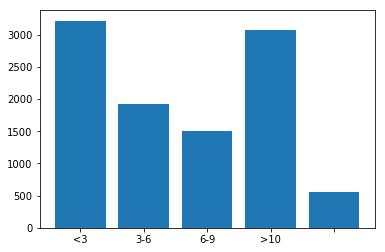

Default


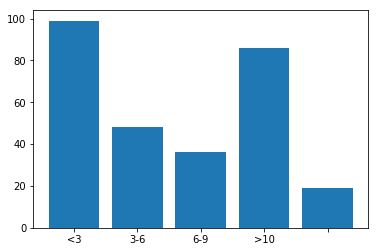

Does not meet the credit policy. Status:Charged Off


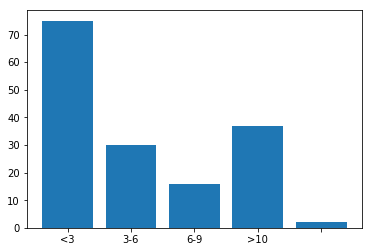

Late (31-120 days)


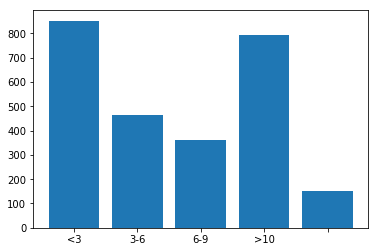

In [51]:

less_than_3 = ['< 1 year', '1 year', '2 years',  '3 years' ]
three_to_6 = [ '4 years','5 years',  '6 years'] 
six_to_9 =  ['7 years', '8 years','9 years'] 
ten_plus = ['10+ years']
nan = ['n/a']
emp_length_bins = [less_than_3, three_to_6, six_to_9, ten_plus, nan]


for value in default_loan_statuses:
    print value
    x = range(len(emp_length_bins))
    y = []
    for i in range(len(emp_length_bins)):
        y.append(default_df.loc[default_df['loan_status'].isin([value]) & default_df['emp_length'].isin(emp_length_bins[i])].shape[0])
    plt.bar(x,y)
    plt.xticks(x, ['<3', '3-6', '6-9', '>10'])
    plt.show()

### 3.2 Bucketing employment lengths 

In [52]:
def emp_length_transform(emp_length):
    print emp_length
    if emp_length in less_than_3:
        return emp_length_bins[0]
    elif emp_length in three_to_6:
        return emp_length_bins[1]
    elif emp_length in six_to_9:
        return emp_length_bins[2]
    elif emp_length in ten_plus:
        return emp_length_bins[3]
    else:
        return emp_length_bins[4]

In [53]:
transformed_df = df
transformed_df['emp_length'].apply(lambda x: emp_length_transform(x))

5 years
10+ years
10+ years
10+ years
2 years
4 years
10+ years
6 years
10+ years
10+ years
10+ years
6 years
10+ years
10+ years
1 year
10+ years
3 years
7 years
9 years
3 years
10+ years
6 years
10+ years
n/a
< 1 year
10+ years
n/a
5 years
1 year
2 years
10+ years
6 years
10+ years
7 years
7 years
6 years
10+ years
n/a
3 years
6 years
5 years
n/a
< 1 year
2 years
n/a
3 years
1 year
6 years
< 1 year
10+ years
10+ years
10+ years
4 years
n/a
< 1 year
10+ years
2 years
10+ years
10+ years
3 years
10+ years
6 years
10+ years
10+ years
10+ years
< 1 year
9 years
10+ years
1 year
8 years
5 years
< 1 year
7 years
6 years
10+ years
1 year
5 years
3 years
< 1 year
5 years
10+ years
9 years
4 years
10+ years
6 years
10+ years
10+ years
< 1 year
10+ years
7 years
6 years
10+ years
8 years
4 years
3 years
10+ years
1 year
10+ years
4 years
1 year
6 years
10+ years
9 years
10+ years
n/a
5 years
1 year
8 years
6 years
10+ years
10+ years
2 years
1 year
2 years
10+ years
n/a
10+ years
< 1 year
8 ye

0                  [4 years, 5 years, 6 years]
1                                  [10+ years]
2                                  [10+ years]
3                                  [10+ years]
4         [< 1 year, 1 year, 2 years, 3 years]
5                  [4 years, 5 years, 6 years]
6                                  [10+ years]
7                  [4 years, 5 years, 6 years]
8                                  [10+ years]
9                                  [10+ years]
10                                 [10+ years]
11                 [4 years, 5 years, 6 years]
12                                 [10+ years]
13                                 [10+ years]
14        [< 1 year, 1 year, 2 years, 3 years]
15                                 [10+ years]
16        [< 1 year, 1 year, 2 years, 3 years]
17                 [7 years, 8 years, 9 years]
18                 [7 years, 8 years, 9 years]
19        [< 1 year, 1 year, 2 years, 3 years]
20                                 [10+ years]
21           

### 3.3 Earliest credit line 
There were 11 rows with NaN values for Earliest credit line field and they were dropped

In [54]:
transformed_df = transformed_df[pd.notnull(transformed_df['earliest_cr_line'])]

### 3.4 Transforming date fields -- earliest_cr_line and apply_date

In [55]:
# dictionary which has month to its corresponding number
months = dict((v,k) for k,v in enumerate(calendar.month_abbr))

def date_transform(date):
    transformed_date = ''
    year_prefix = ''
    month = ''
    year = ''
    date_fields = date.split("-")
    
    # Month followed by year followed by month --> 20th century (1900 - 2000)
    if date_fields[0].isalpha():
        year_prefix = '19'
        month = months[date_fields[0]]
        year = date_fields[1]
    else:
        # Month followed by month followed by year --> 21st century (2000 - current)
        year_prefix = '20'
        month = months[date_fields[1]]
        year = date_fields[0]
    
    if len(year) == 2:
        year = year_prefix + year
    elif len(year) == 1:
        year = year_prefix + '0' + year
    
    # Uniform transformation of date to Year-Month format
    transformed_date = year + "-" + str(month)
    
    return transformed_date

In [56]:
# Finding the number of months elapsed from date1 to current date (or date2), with current date being default
def months_between(d1, d2='2017-6'):
    d1 = datetime.strptime(d1, "%Y-%m")
    d2 = datetime.strptime(d2, "%Y-%m") 
    return abs((d2 - d1).days)/30

In [57]:
transformed_df['earliest_cr_line'] = transformed_df['earliest_cr_line'].apply(lambda x: date_transform(x))
transformed_df['earliest_cr_line'] = transformed_df['earliest_cr_line'].apply(lambda x: months_between(x))
transformed_df['apply_date'] = transformed_df['apply_date'].apply(lambda x: date_transform(x))
transformed_df['apply_date'] = transformed_df['apply_date'].apply(lambda x: months_between(x))

### 3.6 One hot encoding of columns 

In [58]:
one_hot_columns = ['addr_state', 'application_type','purpose', 'verification_status', 'verification_status_joint','home_ownership','emp_length']
for col in one_hot_columns:
    # does one hot encoding based on values of col
    print col
    df_with_dummies = pd.get_dummies(df[col], prefix=col)
    transformed_df = transformed_df.drop(col, axis=1)
    transformed_df = transformed_df.join(df_with_dummies)

addr_state
application_type
purpose
verification_status
verification_status_joint
home_ownership
emp_length


### 3.7 Removing some features

###### 1. Dropped some columns that were either left for future work or not useful [ ID, Emp_Title, Title]
##### Note : The Emp Title and Title can be used as a feature vector by using NLP and refining the feature vector futher. In this Sample, I have done a very simple Word Cloud to Show the prominent Titles, but given the time frame, couldn't incorporate in my model. 
###### 2.  Updated the Loan Status to class non-defaulters ( labelled : 0 ) and defaulters ( labelled : 1)

In [59]:
transformed_df =  transformed_df.drop('id', axis=1)
transformed_df =  transformed_df.drop('emp_title', axis=1)
transformed_df =  transformed_df.drop('title', axis=1)

### 3.8 Updating labels 

In [60]:
def get_label(loan_status):
    if loan_status in default_loan_statuses:
        return 1
    return 0

transformed_df['loan_status'] = transformed_df['loan_status'].apply(lambda x: get_label(x))

In [61]:
pickle.dump(transformed_df,open("dataframe_with_nan.p","wb") )

### 3.5 Missing values in mths_since_last_major_derog

##### In this approach we use the mean score to fill out the NAN fields in 'mths_since_last_major_derog' and train a model. In subsequent notebooks we fit a model to generate the NAN and train a model on top of it.

In [62]:
#df_for_training = transformed_df
transformed_df['mths_since_last_major_derog'].fillna((transformed_df['mths_since_last_major_derog'].mean()), inplace=True) #replace with mean

## 4. Text Analysis on emp title and loan title

##### Simple Word Cloud To show the different Keywords and High Frequency Words in the Emp-Title and Title Description


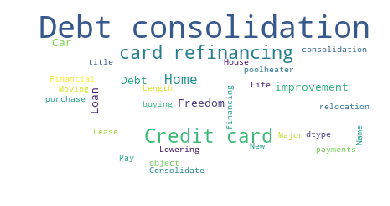

In [17]:
from IPython.display import Image
Image(filename='emp-title.png') 

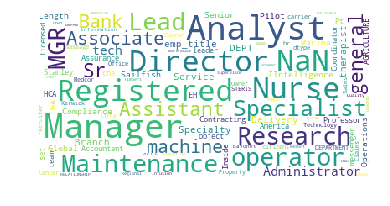

In [18]:
Image(filename='title.png') 

In [202]:
import pickle
pickle.dump(transformed_df,open("dataframe.p","wb") )

### 5.  Statewise Defaulters stats

##### Here I analyze the distribution of the Number of Loan Takers, The Number of Defaulters and The Number of Non-Defaulters by State of US. 
##### To get a complete picture I used Percentage of Defaulters as a good Indicator 
##### The Distribution is shown on the US Map using plotly (Online) and I have attached the result image.


In [221]:
d_default = {}
d_normal = {}
for i in range(len(df_temp)):
     if df_temp['loan_status'][i] == 1:
         if df_temp['addr_state'][i] not in d_default:            
             d_default[df['addr_state'][i]] = 1
         else: 
             d_default[df['addr_state'][i]] += 1
     else: 
         if df_temp['addr_state'][i] not in d_normal:            
            d_normal[df['addr_state'][i]] = 1
         else: 
             d_normal[df['addr_state'][i]] += 1

In [225]:

d_default = pd.DataFrame(d_default.values(),index = d_default.keys(),columns = ['count_default'])
d_normal = pd.DataFrame(d_normal.values(),index = d_normal.keys(),columns = ['count_not_default'])


TypeError: 'numpy.ndarray' object is not callable

In [236]:
d_state_stats = pd.concat([d_default, d_normal], axis=1)

d_state_stats['loan_takers'] = d_state_stats['count_default'] + d_state_stats['count_not_default']

d_state_stats['percentage defaulters'] = (d_state_stats['count_default']*100)/(d_state_stats['loan_takers'])

d_state_stats = d_state_stats.sort(['percentage defaulters'], ascending=[0])

d_state_stats.to_csv('final.csv')

### 6. Graphs from pyplot

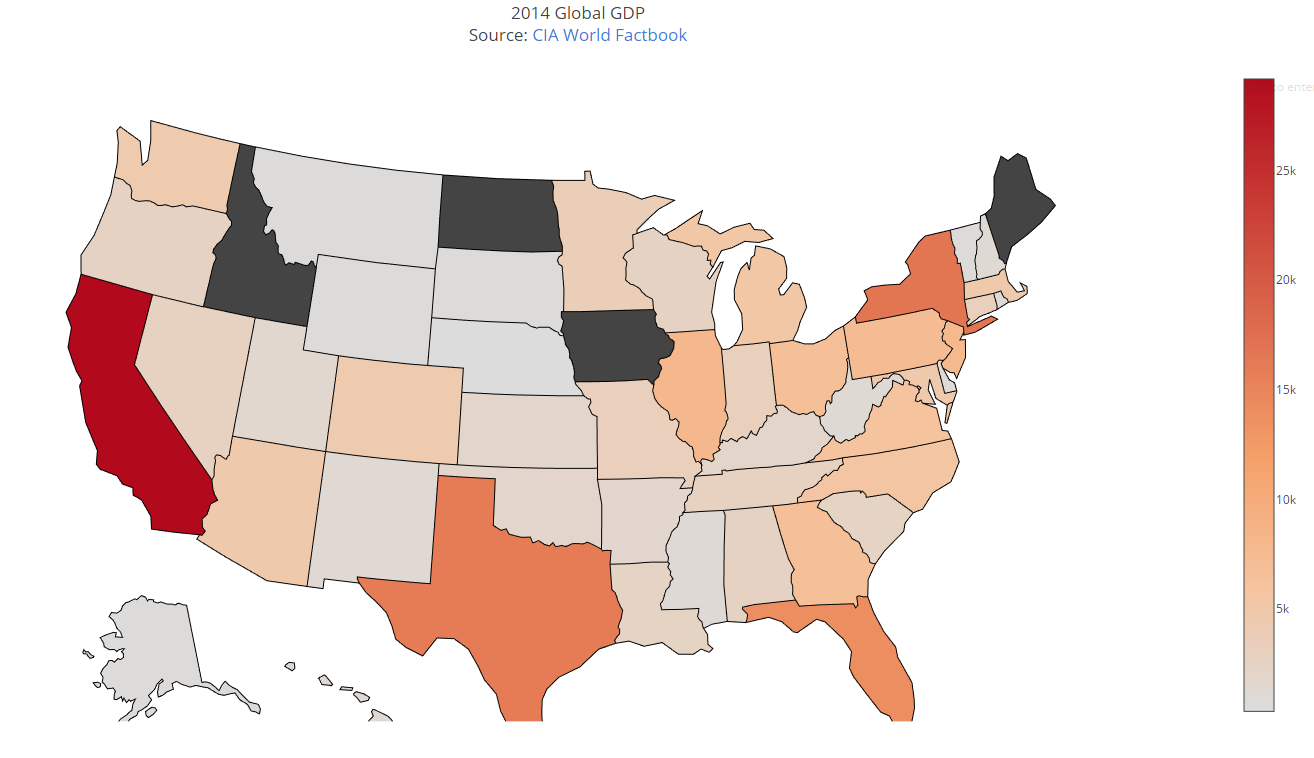

In [250]:
Image(filename='Loan_Takers.png') 

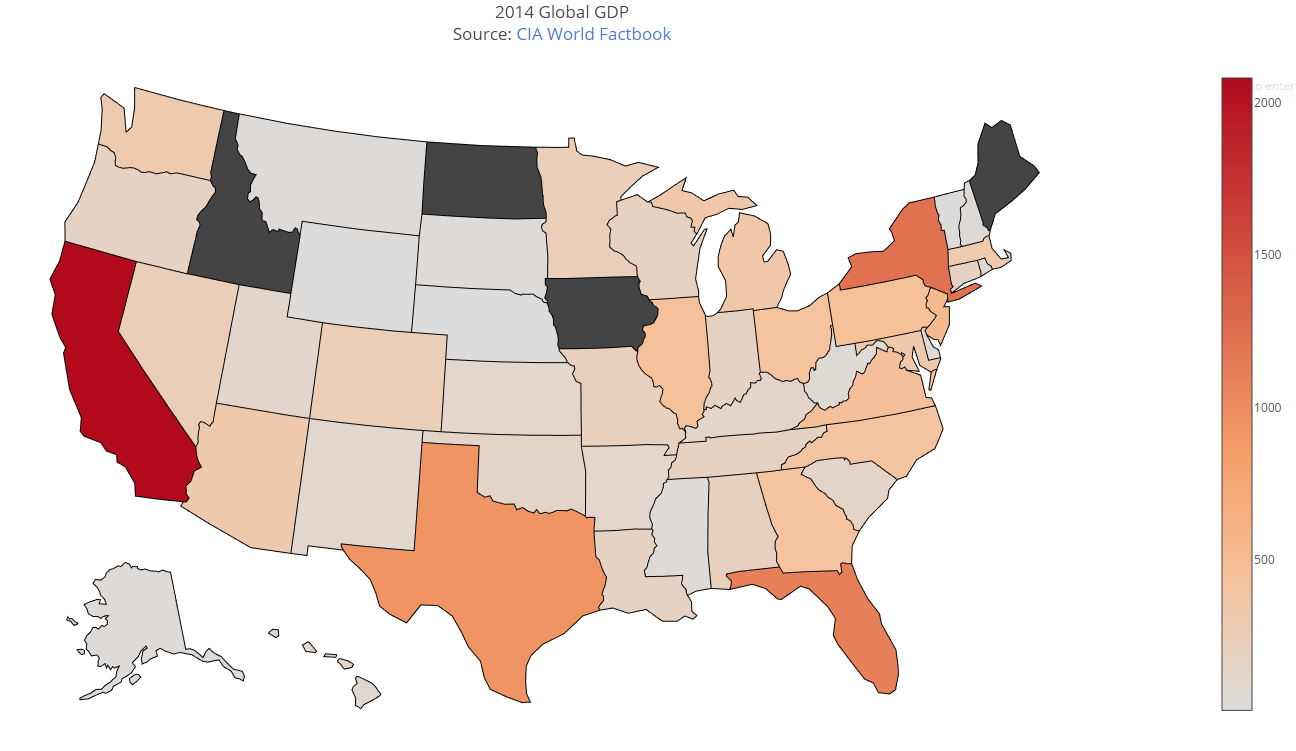

In [251]:
Image(filename='Defaulters.png') 

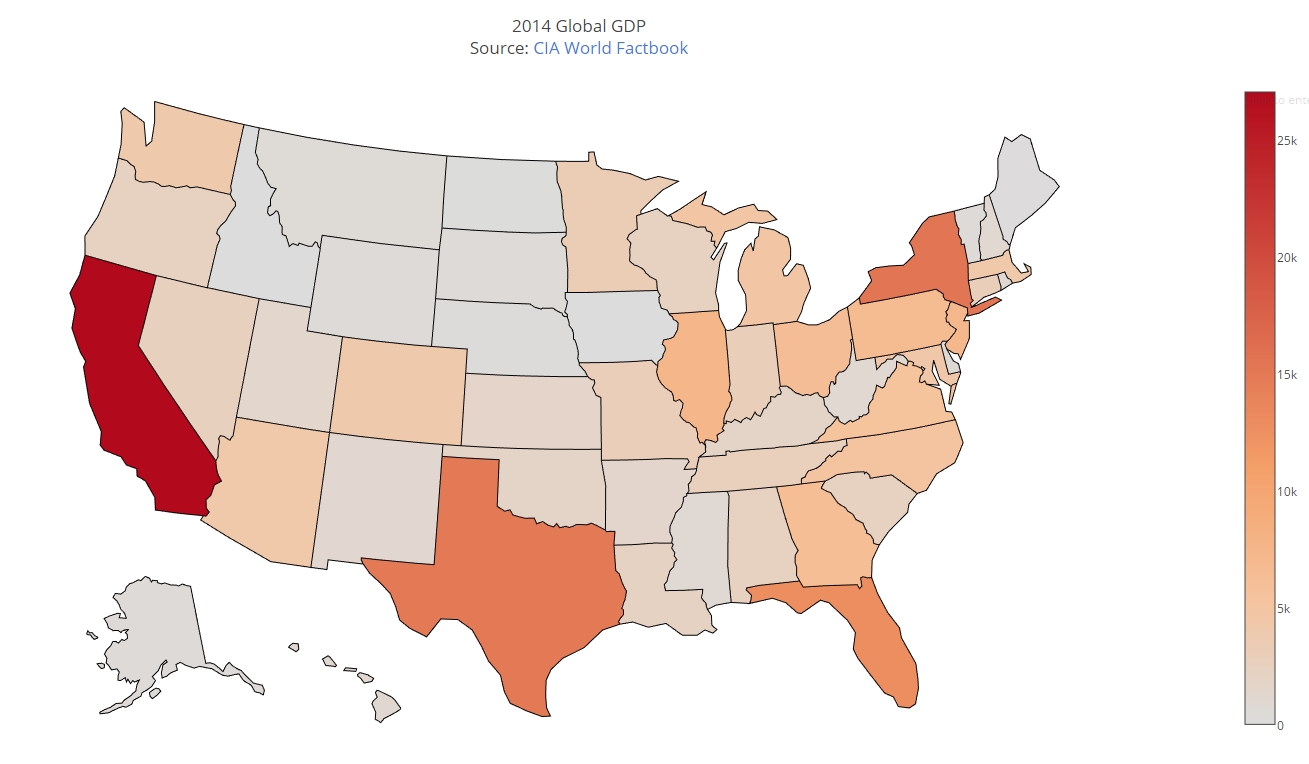

In [253]:
Image(filename='Not_defaulters.png') 

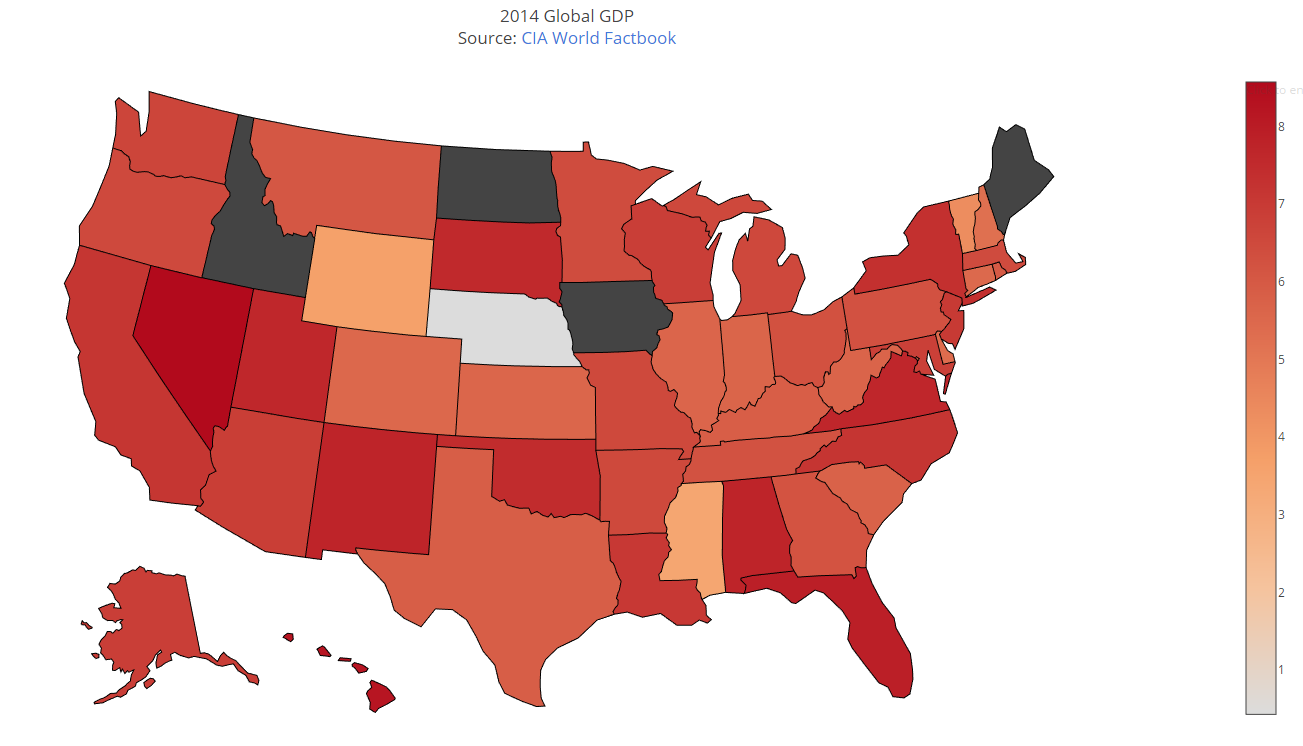

In [254]:
Image(filename='percent_defaulters.png') 